In [1]:
from urllib import urlopen
html = urlopen("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data")
htmltxt = html.read().splitlines()
datakey = ['age','workplace','fnlwgt','education','education-num','marital-status',
           'occupation','relationship','race','sex','capital-gain','capital-loss',
           'hours-per-week','native-country','income']
list1 = []
d = {}
for i in htmltxt:
    temp = i.decode().split(",")
    if temp == ['']:
        break
    tempdict = dict(zip(datakey, temp))
    list1.append(tempdict)
for k in tempdict.keys():
    d[k] = tuple(d[k] for d in list1)

import json
with open('adult_dict.json','w') as f:
    json.dump(d, f)


In [2]:
from collections import Counter
import json
import pandas as pd
import matplotlib.pyplot as plt

with open('adult_dict.json') as f:
    d = json.load(f)


indices1 = [i for i, x in enumerate(d['income']) if x == d['income'][0]]
indices2 = [i for i, x in enumerate(d['income']) if x == d['income'][9]]

In [3]:
above_sex = []
below_sex = []
for i in indices1:
    below_sex.append(d['sex'][i])
for i in indices2:
    above_sex.append(d['sex'][i])
    
above_job = []
below_job = []
for i in indices1:
    below_job.append(d['occupation'][i])
for i in indices2:
    above_job.append(d['occupation'][i])
    
above_wc = []
below_wc = []
for i in indices1:
    below_wc.append(d['workplace'][i])
for i in indices2:
    above_wc.append(d['workplace'][i])

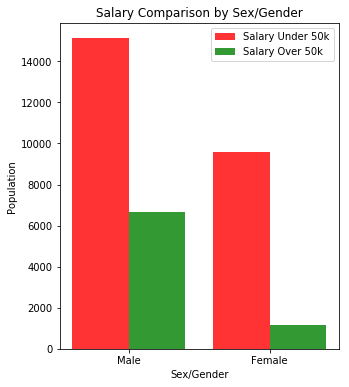

In [10]:
import numpy as np
above_count = pd.Series(above_sex).value_counts() 
below_count = pd.Series(below_sex).value_counts() 
n_groups = 2
under = (below_count.values[0], below_count.values[1])
over = (above_count.values[0], above_count.values[1])
ind = np.arange(n_groups)
bar_width = 0.4
opacity = 0.8
plt.figure(figsize=(5,6))
rects1 = plt.bar(ind, under, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Salary Under 50k')
rects1 = plt.bar(ind + bar_width, over, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Salary Over 50k')
plt.xlabel('Sex/Gender')
plt.ylabel('Population')
plt.title('Salary Comparison by Sex/Gender')
plt.xticks(ind + bar_width/2, ('Male', 'Female'))
plt.legend()
plt.savefig('GenderComparison.png')
#plt.tight_layout()
plt.show()

c:\users\andrew\miniconda2\lib\site-packages\matplotlib\legend.py:1364: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


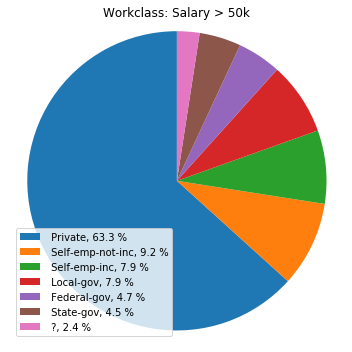

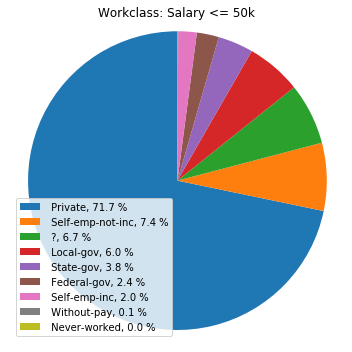

In [5]:
abwc = pd.Series(above_wc).value_counts() 
above_s = pd.DataFrame({'Workclass':abwc.index, 'Count':abwc.values})
abwclist = above_s['Workclass'].tolist()
abctlist = above_s['Count'].tolist()
plt.figure(figsize=(5,5))
patches, texts = plt.pie(abctlist, startangle=90)
plt.legend(patches, loc="lower left", labels=['%s, %1.1f %%' % (l, s) for l, s in zip(abwclist, map(lambda x: float(x*100)/sum(abctlist),abctlist))])
plt.title('Workclass: Salary > 50k')
plt.tight_layout()
plt.axis('equal')
plt.savefig('workclassabove.png')
plt.show()

blwc = pd.Series(below_wc).value_counts() 
below_s = pd.DataFrame({'Workclass':blwc.index, 'Count':blwc.values})
blwclist = below_s['Workclass'].tolist()
blctlist = below_s['Count'].tolist()
plt.figure(figsize=(5,5))
patches, texts = plt.pie(blctlist, startangle=90)
plt.legend(patches,loc="lower left",labels=['%s, %1.1f %%' % (l, s) for l, s in zip(blwclist, map(lambda x: float(x*100)/sum(blctlist),blctlist))])
plt.title('Workclass: Salary <= 50k')
plt.tight_layout()
plt.axis('equal')
plt.savefig('workclassbelow.png')
plt.show()

<Figure size 360x360 with 0 Axes>

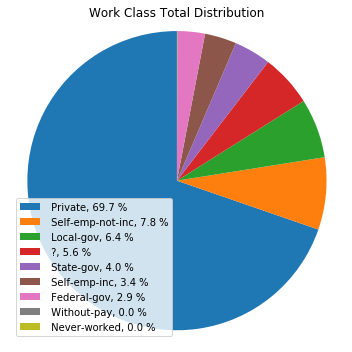

In [6]:
import pandas as pd
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",header=None)
data.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary-class']
occ = data['occupation'].value_counts()
wor = data['workclass'].value_counts()
plt.figure(figsize=(5,5))
wc = pd.DataFrame({'Workclass':wor.index, 'Count':wor.values})
wclist = wc['Workclass'].tolist()
ctlist = wc['Count'].tolist()
plt.figure(figsize=(5,5))
patches, texts = plt.pie(ctlist, startangle=90)
plt.legend(patches, loc="lower left", labels=['%s, %1.1f %%' % (l, s) for l, s in zip(wclist, map(lambda x: float(x*100)/sum(ctlist), ctlist))])
plt.title('Work Class Total Distribution')
plt.tight_layout()
plt.axis('equal')
plt.savefig('workclasstotal.png')
plt.show()

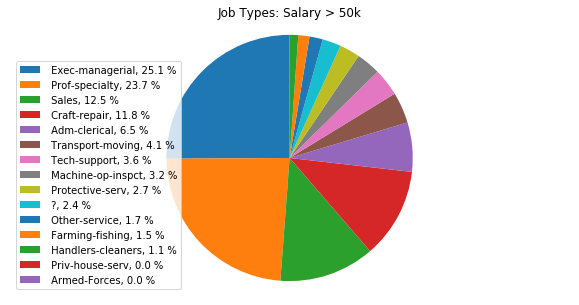

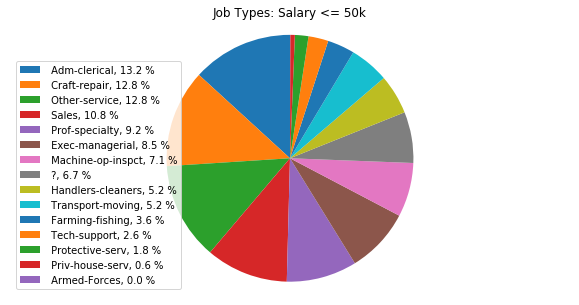

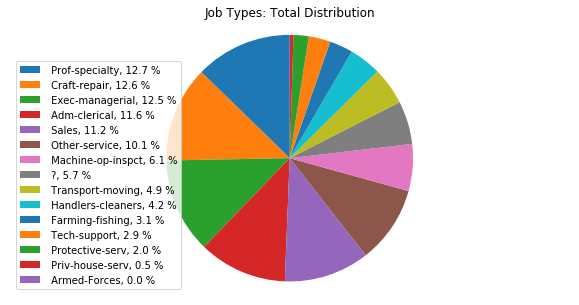

In [19]:
# Should we make legend colors not repeat? Also exploded pie might look better?

abj = pd.Series(above_job).value_counts() 
abj_s = pd.DataFrame({'Job Type':abj.index, 'Count':abj.values})
abjlist = abj_s['Job Type'].tolist()
abjclist = abj_s['Count'].tolist()
plt.figure(figsize=(10,5))
plt.tight_layout()
patches, texts = plt.pie(abjclist, startangle=90)
plt.legend(patches,bbox_to_anchor=(0,0),loc="lower left",labels=['%s, %1.1f %%' % (l, s) for l, s in zip(abjlist, map(lambda x: float(x*100)/sum(abjclist),abjclist))])
plt.title('Job Types: Salary > 50k')
plt.axis('equal')
plt.savefig('jobtypeabove.png')
plt.show()

blj = pd.Series(below_job).value_counts() 
blj_s = pd.DataFrame({'Job Type':blj.index, 'Count':blj.values})
bljlist = blj_s['Job Type'].tolist()
bljclist = blj_s['Count'].tolist()
plt.figure(figsize=(10,5))
plt.tight_layout()
patches, texts = plt.pie(bljclist, startangle=90)
plt.legend(patches,bbox_to_anchor=(0,0),loc="lower left",labels=['%s, %1.1f %%' % (l, s) for l, s in zip(bljlist, map(lambda x: float(x*100)/sum(bljclist),bljclist))])
plt.title('Job Types: Salary <= 50k')
plt.axis('equal')
plt.savefig('jobtypebelow.png')
plt.show()

tlj = pd.Series(d['occupation']).value_counts() 
tlj_s = pd.DataFrame({'Job Type':tlj.index, 'Count':tlj.values})
tljlist = tlj_s['Job Type'].tolist()
tljclist = tlj_s['Count'].tolist()
plt.figure(figsize=(10,5))
plt.tight_layout()
patches, texts = plt.pie(tljclist, startangle=90)
plt.legend(patches,bbox_to_anchor=(0,0),loc="lower left",labels=['%s, %1.1f %%' % (l, s) for l, s in zip(tljlist, map(lambda x: float(x*100)/sum(tljclist),tljclist))])
plt.title('Job Types: Total Distribution')
plt.axis('equal')
plt.savefig('jobtypetotal.png')
plt.show()